In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
path='/content/drive/MyDrive/Autoimmune'

In [ ]:
path_lst=[]
label_lst=[]
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path, i)):
        path_lst.append(os.path.join(path, i, j))
        label_lst.append(i)


In [ ]:
len(path_lst),len(label_lst)

In [ ]:
df=pd.DataFrame({'Path':path_lst,
                'Label':label_lst})
df.shape

(1405, 2)

In [ ]:
df.head()

,Path,Label
0,/content/drive/MyDrive/Autoimmune/Lupus/lupus-...,Lupus
1,/content/drive/MyDrive/Autoimmune/Lupus/2547__...,Lupus
2,/content/drive/MyDrive/Autoimmune/Lupus/2546__...,Lupus
3,/content/drive/MyDrive/Autoimmune/Lupus/lupus-...,Lupus
4,/content/drive/MyDrive/Autoimmune/Lupus/2529__...,Lupus


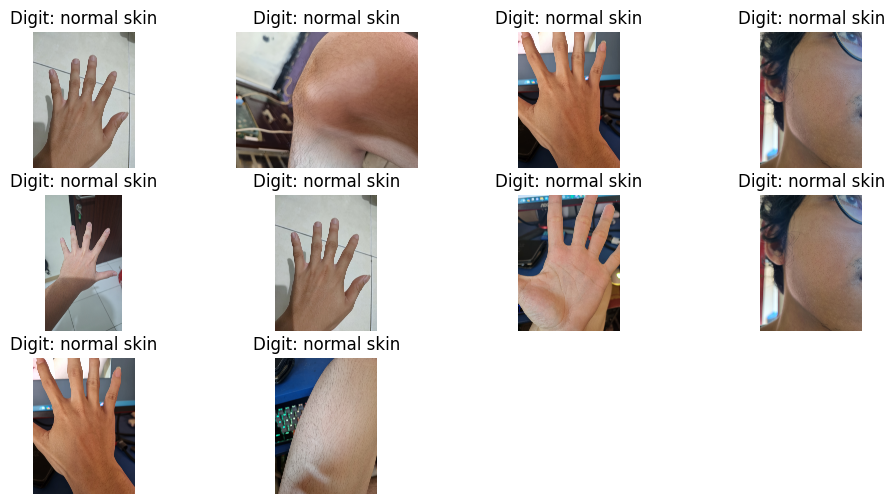

In [ ]:
import cv2
c=0
plt.figure(figsize=(12, 6))
for i in range(1000,1010):
    plt.subplot(3, 4, c + 1)
    image = cv2.imread(path_lst[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"Digit: {label_lst[i]}")
    plt.axis('off')
    c+=1
plt.show()


<ipython-input-9-e5ffad66f46e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label',data=df,palette='bright')


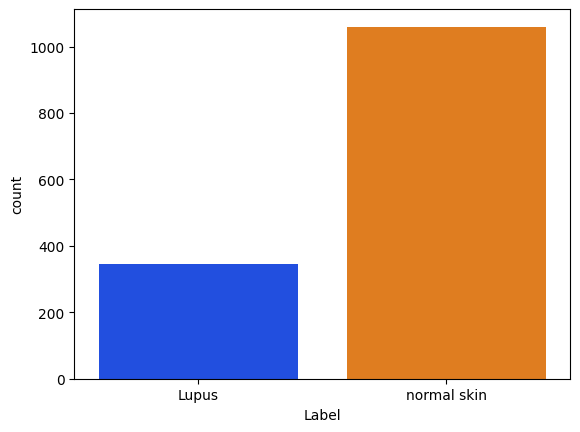

In [ ]:
sns.countplot(x='Label',data=df,palette='bright')
plt.show()

In [ ]:
import cv2

x = []
y = []
new_width = 400
new_height = 400

total_rows = len(df)  # Total number of rows in the DataFrame

for ind, row in df.iterrows():
    try:
        # Read and process the image
        image = cv2.imread(row['Path'])
        resized_image = cv2.resize(image, (new_width, new_height))
        image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

        # Append processed image and label to lists
        x.append(image_rgb)
        y.append(row['Label'])

        # Print progress every 10 rows
        if ind % 10 == 0:
            print(f"Processing row {ind + 1} of {total_rows}")

    except Exception as e:
        print(f"Error processing row {ind + 1}: {e}")

# Indicate completion
print("Processing complete!")

Processing row 1 of 1405
Processing row 11 of 1405
Processing row 21 of 1405
Processing row 31 of 1405
Processing row 41 of 1405
Processing row 51 of 1405
Processing row 61 of 1405
Processing row 71 of 1405
Processing row 81 of 1405
Processing row 91 of 1405
Processing row 101 of 1405
Processing row 111 of 1405
Processing row 121 of 1405
Processing row 131 of 1405
Processing row 141 of 1405
Processing row 151 of 1405
Processing row 161 of 1405
Processing row 171 of 1405
Processing row 181 of 1405
Processing row 191 of 1405
Processing row 201 of 1405
Processing row 211 of 1405
Processing row 221 of 1405
Processing row 231 of 1405
Processing row 241 of 1405
Processing row 251 of 1405
Processing row 261 of 1405
Processing row 271 of 1405
Processing row 281 of 1405
Processing row 291 of 1405
Processing row 301 of 1405
Processing row 311 of 1405
Processing row 321 of 1405
Processing row 331 of 1405
Processing row 341 of 1405
Processing row 351 of 1405
Processing row 361 of 1405
Processing r

In [ ]:
x[0].shape

(400, 400, 3)

In [ ]:
print(x[0])

[[[129  89  81]
  [134  95  86]
  [132  94  85]
  ...
  [ 92  65  56]
  [ 91  67  57]
  [ 97  74  63]]

 [[131  91  83]
  [133  93  85]
  [128  90  81]
  ...
  [ 92  65  56]
  [ 95  68  59]
  [ 97  74  64]]

 [[133  93  85]
  [133  93  85]
  [127  89  80]
  ...
  [ 88  62  52]
  [ 94  68  59]
  [ 98  74  64]]

 ...

 [[ 84  61  54]
  [ 91  68  60]
  [ 82  59  51]
  ...
  [ 53  32  28]
  [ 66  43  38]
  [ 77  52  45]]

 [[ 85  62  54]
  [ 91  68  61]
  [ 87  64  56]
  ...
  [ 52  31  28]
  [ 69  46  40]
  [ 80  55  48]]

 [[ 85  62  54]
  [ 89  66  58]
  [ 95  72  64]
  ...
  [ 56  36  33]
  [ 79  56  50]
  [ 90  65  59]]]


In [ ]:
print(len(x),len(y))

1405 1405


In [ ]:
x=np.array(x)/255

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y=np.array(y)
y_reshaped = y.reshape(-1, 1)
encoded = encoder.fit_transform(y_reshaped)
print(encoded)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (400,400,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 ),metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 400, 400, 32)      2432      
                                                                 
 conv2d_11 (Conv2D)          (None, 400, 400, 32)      25632     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 200, 200, 32)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 200, 200, 32)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 200, 200, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 128)     73856     
                                                      

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,encoded,test_size=0.2,stratify=encoded)

In [ ]:
hst=model.fit(X_train, y_train, batch_size=100,
                epochs=10)

Epoch 1/10
12/12 [==============================] - 207s 17s/step - loss: 3.0395 - accuracy: 0.7037
Epoch 2/10
12/12 [==============================] - 206s 17s/step - loss: 0.4192 - accuracy: 0.7562
Epoch 3/10
12/12 [==============================] - 206s 17s/step - loss: 0.3893 - accuracy: 0.7847
Epoch 4/10
12/12 [==============================] - 206s 17s/step - loss: 0.3666 - accuracy: 0.8043
Epoch 5/10
12/12 [==============================] - 206s 17s/step - loss: 0.3528 - accuracy: 0.8407
Epoch 6/10
12/12 [==============================] - 207s 17s/step - loss: 0.3589 - accuracy: 0.8327
Epoch 7/10
12/12 [==============================] - 207s 17s/step - loss: 0.3564 - accuracy: 0.8283
Epoch 8/10
12/12 [==============================] - 206s 17s/step - loss: 0.3359 - accuracy: 0.8407
Epoch 9/10
12/12 [==============================] - 206s 17s/step - loss: 0.3495 - accuracy: 0.8443
Epoch 10/10
12/12 [==============================] - 207s 17s/step - loss: 0.3473 - accuracy: 0.8523

In [ ]:
model.save('/content/drive/MyDrive/untitled.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model from file
loaded_model = load_model('/content/drive/MyDrive/untitled.h5')

In [ ]:
X_test.shape

(281, 400, 400, 3)

In [ ]:
pred=loaded_model.predict(X_test)

9/9 [==============================] - 5s 526ms/step


In [ ]:
pred_val=[]
for i in pred:
    pred_val.append(np.argmax(i))

In [ ]:
org_y=[]
for i in y_test:
    org_y.append(np.argmax(i))

In [ ]:
result_df_=pd.DataFrame(confusion_matrix(pred_val,org_y),columns=['Lupus', 'normal skin'],index=['Lupus', 'normal skin'])

In [ ]:
result_df_

,Lupus,normal skin
Lupus,61,30
normal skin,8,182


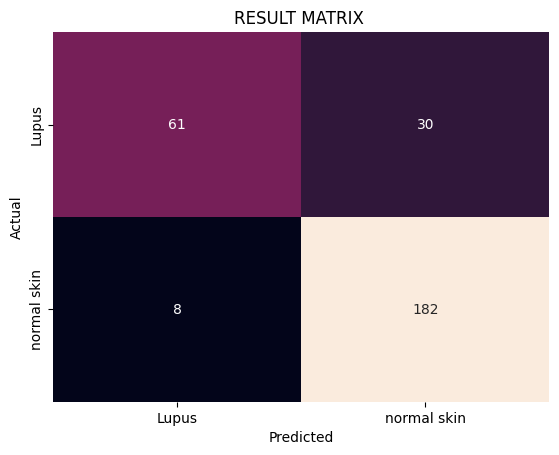

In [ ]:
sns.heatmap(result_df_,annot=True,cbar=False,fmt='g')
plt.title('RESULT MATRIX ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
print(f"Accuracy: {accuracy_score(pred_val,org_y)}")
print(f'Precision: {precision_score(pred_val,org_y)}')
print(f"Recall: {recall_score(pred_val,org_y)}")
print(f"f1_score: {f1_score(pred_val,org_y)}")

Accuracy: 0.8647686832740213
Precision: 0.8584905660377359
Recall: 0.9578947368421052
f1_score: 0.9054726368159204


**MAKING PREDICTIONS WITH NEW DATA**

In [ ]:
categories = encoder.categories_[0]
categories

array(['Lupus', 'normal skin'], dtype='<U11')

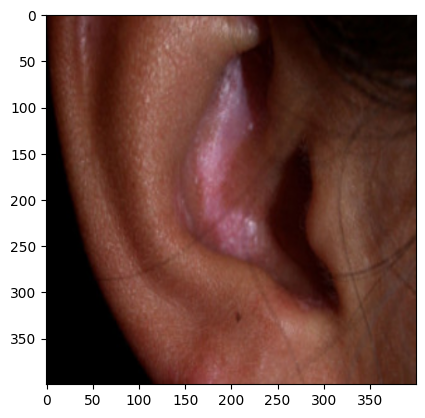

In [ ]:
import cv2
path='/content/drive/MyDrive/Autoimmune/Lupus/2538__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDg1XQ.jpeg'
try:
    # Read and process the image
    image = cv2.imread(path)
    resized_image = cv2.resize(image, (400, 400))
    test_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_rgb)

except Exception as e:
      print(f"Error Occured: {e}")

In [ ]:
nor_img=(test_image_rgb)/255
array_4d = np.expand_dims(nor_img, axis=0)
test_predicted=loaded_model.predict(array_4d)
print(f"Result  :{categories[np.argmax(test_predicted)]}")


1/1 [==============================] - 0s 83ms/step
Result  :normal skin
